In [30]:
# Import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import os # accessing directory structure
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
# Import the file 'energy_efficiency_data.csv'
df = pd.read_csv('energy_efficiency_data.csv')

# Print the number of rows and columns in df

print(df.shape)

# Print the first five rows of df
df.head()

(768, 10)


,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [32]:
#check shape of the data frame

df.shape

(768, 10)

In [33]:
#check type

type(df)

pandas.core.frame.DataFrame

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [35]:
# Checking for duplicates

df.duplicated().value_counts()

False    768
dtype: int64

In [36]:
# Checking initial statistics

df.describe().round(1)

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.0,768.0,768.0,768.0,768.0,768.0,768.0,768.0,768.0,768.0
mean,0.8,671.7,318.5,176.6,5.2,3.5,0.2,2.8,22.3,24.6
std,0.1,88.1,43.6,45.2,1.8,1.1,0.1,1.6,10.1,9.5
min,0.6,514.5,245.0,110.2,3.5,2.0,0.0,0.0,6.0,10.9
25%,0.7,606.4,294.0,140.9,3.5,2.8,0.1,1.8,13.0,15.6
50%,0.8,673.8,318.5,183.8,5.2,3.5,0.2,3.0,19.0,22.1
75%,0.8,741.1,343.0,220.5,7.0,4.2,0.4,4.0,31.7,33.1
max,1.0,808.5,416.5,220.5,7.0,5.0,0.4,5.0,43.1,48.0


In [37]:
#calculate the correlation between the two arrays

np.corrcoef(df['Surface_Area'], df['Heating_Load'])

array([[ 1.        , -0.65812023],
       [-0.65812023,  1.        ]])

In [38]:
df['Surface_Area'].mean()

671.7083333333334

In [6]:
df['Wall_Area'].quantile(.9)

367.5

In [12]:
df['Heating_Load'].std()

10.090195732006158

<AxesSubplot:>

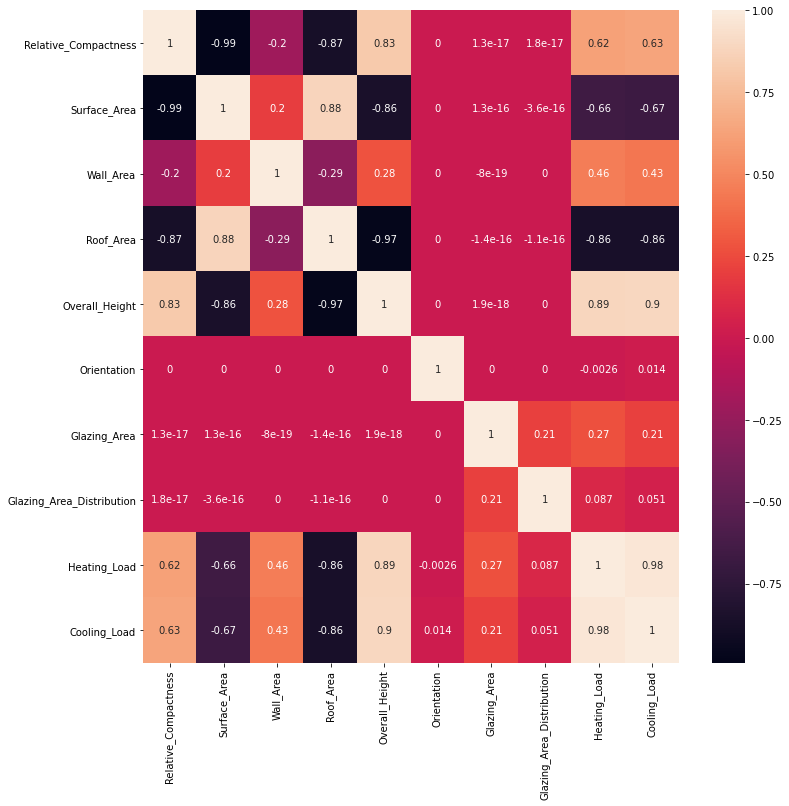

In [16]:
# Preview correlation
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)

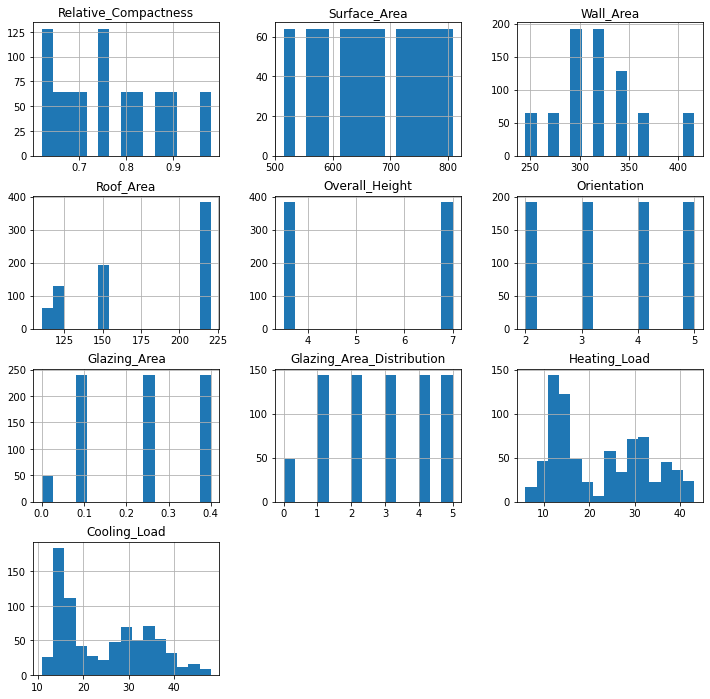

In [58]:
df.hist(bins=15, figsize=(15,10));

In [52]:
#plotScatterMatrix(df, 20, 10)
#ScatterPlot Matrix
import plotly.express as px
fig = px.scatter_matrix(df)
fig.update_xaxes(tickangle=90)
fig.show()

<AxesSubplot:xlabel='Heating_Load'>

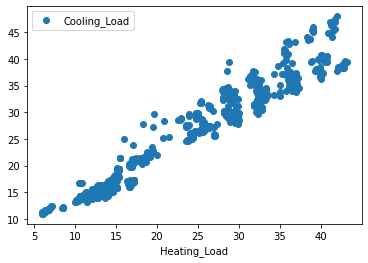

In [40]:
df.plot(x = 'Heating_Load',y = 'Cooling_Load', style='o')

<AxesSubplot:xlabel='Surface_Area'>

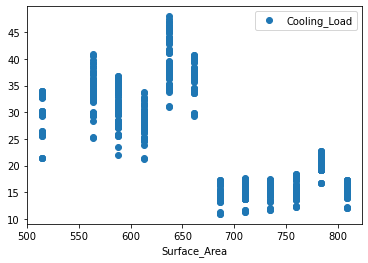

In [43]:
df.plot(x = 'Surface_Area',y = 'Cooling_Load', style='o')

<AxesSubplot:xlabel='Cooling_Load'>

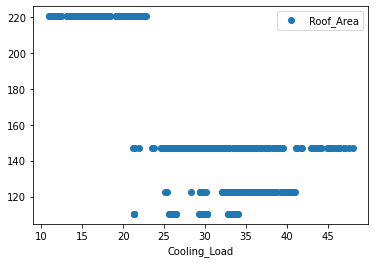

In [45]:
df.plot(x = 'Cooling_Load',y = 'Roof_Area', style='o')

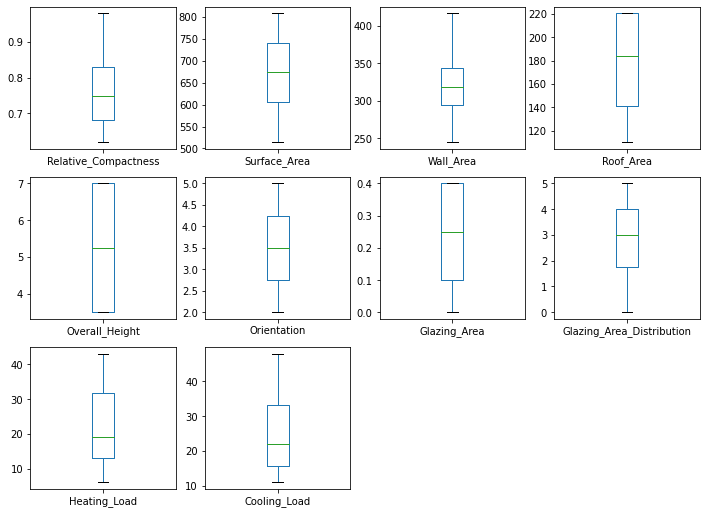

In [54]:
#boxplot
df.plot(kind = 'box', subplots = True, layout = (4, 4), sharex = False, sharey = False, figsize = (12, 12));

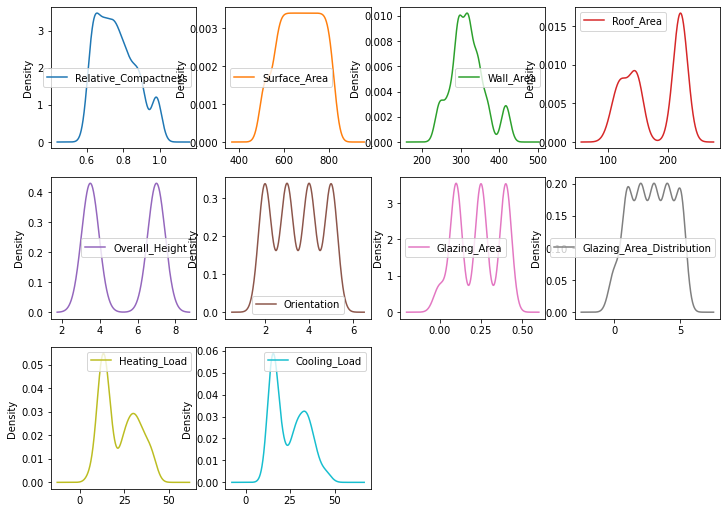

In [55]:
df.plot(kind = 'density', subplots= True, layout = (4,4), sharex =False, figsize = (12, 12));

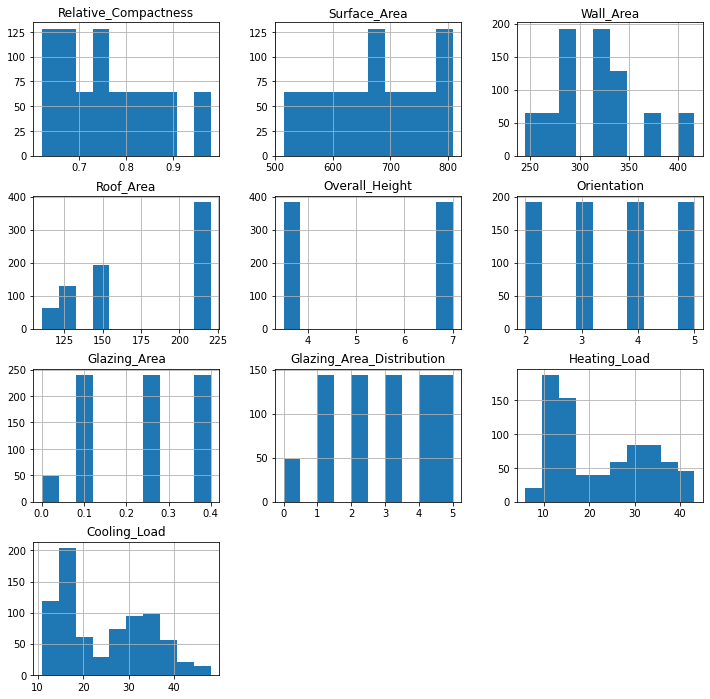

In [57]:
numbers = pd.Series(df.columns)
df[numbers].hist(figsize = (12, 12))
plt.show();

In [59]:
#Surface Area Vs Wall Area
fig = px.density_heatmap(df, x=df['Surface_Area'], y=df['Wall_Area'], marginal_x="box", marginal_y="violin", title = "Surface Area Vs Wall Area")
fig.show()

In [60]:
#Surface Area Vs Roof Area
fig = px.density_heatmap(df, x=df['Surface_Area'], y=df['Roof_Area'], marginal_x="box", marginal_y="violin")
fig.show()

In [63]:
#Surface Area Vs Overall height
fig = px.density_heatmap(df, x=df['Surface_Area'], y=df['Overall_Height'], marginal_x="box", marginal_y="violin")
fig.show()

In [70]:
#Glazing area Vs Glazing Area distribution
fig = px.density_heatmap(df, x=df['Glazing_Area'], y=df['Glazing_Area_Distribution'], marginal_x="box", marginal_y="violin")
fig.show()

In [71]:
#Heating Load Vs Cooling Load 
fig = px.density_heatmap(df, x=df['Heating_Load'], y=df['Cooling_Load'], marginal_y="violin")
fig.show()

In [73]:
#BarPlot (Surface area, wall area, roof area)
fig = px.bar(df, x=df['Surface_Area'], y=df['Wall_Area'], color="Roof_Area", barmode="group")
fig.show()

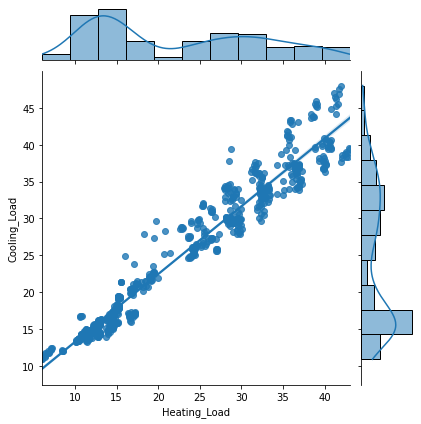

In [75]:
sns.jointplot(x=df['Heating_Load'], y=df['Cooling_Load'], data= df, kind="reg");

In [84]:
sns.pairplot(df, x_vars=[df['Surface_Area'], df['Overall_Height'], df['Orientation']], y_vars=df['Relative_Compactness'],height=5, aspect=.8, kind="reg");

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

ValueError: Image size of 864x276480 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 864x276480 with 2304 Axes>

In [ ]:
sns.pairplot(df, x_vars=df['Surface_Area'], y_vars=df['Relative_Compactness'],height=5, aspect=.8, kind="reg");

In [ ]:
df.plot(kind='density', subplots=True, layout=(5,2), figsize=(20, 15), sharex=False)
plt.show()